# Uber Pickups in New York City

## Import library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool

# Understanding the data

In [2]:
import os

os.listdir(r"D:/Aulia/Documents/Data/Uber pickups in NYC/")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

there are lot of data here, but we gonna focus on the raw data of trip from April to September 2014, so wedon't need the "janjune-15.csv"

In [3]:
files = os.listdir(r"D:/Aulia/Documents/Data/Uber pickups in NYC/")[-7:]
files.remove("uber-raw-data-janjune-15.csv")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

Now we need to put it all in one data frame by concating, so it will be easier for us to analysis in bigger picture.

In [4]:
path = r"D:/Aulia/Documents/Data/Uber pickups in NYC/"
data = pd.DataFrame()
for file in files:
    df = pd.read_csv(path+"/"+file, encoding='utf-8')
    data = pd.concat([data,df])

In [5]:
df = data.copy()
df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


The data consist of 4 mil records of trips and has 4 columns representing:
-  Date/Time: The date and time of the Uber pickup.
-  Lat: The latitude of the Uber pickup.
-  Lon: The latitude of the Uber pickup.
-  Base: is the TLC (Taxi and Limousine Commisions) bas company code affiliated with the Uber pickup.

## Data quality check

### Missing Values

In [7]:
df.isnull().sum() # to returns the number of missing values

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

## Data Manipulation
As you can see the date/ime is still an object type. To make it easier to analyze, we need to change it to datetime form :D

In [8]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format = "%m/%d/%Y %H:%M:%S")
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [9]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


Now we can split the "Date/Time" in day, date, month, hour, and minute columns.

In [10]:
df["Weekday"] = df["Date/Time"].dt.day_name()
df["Date"] = df["Date/Time"].dt.day
df["Month"] = df["Date/Time"].dt.month
df["Hour"] = df["Date/Time"].dt.hour
df["Minute"] = df["Date/Time"].dt.minute

df.head()

,Date/Time,Lat,Lon,Base,Weekday,Date,Month,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,4,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,4,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,4,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,4,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,4,0,33


In [11]:
map_month = {4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September"}

df["Month"] = df["Month"].replace(map_month)
df = df.sort_values(by=["Month", "Date"])

## Analysis
We'll be doing analysis based on question we defined earlier~

In [12]:
df.head()

,Date/Time,Lat,Lon,Base,Weekday,Date,Month,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,April,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,April,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,April,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,April,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,April,0,33


### 1. Pickup distribution by Month and Date
Before we're strating the analysis, i am going to install plotly first since i have not installed it yet hehe.

In [13]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from pandas.api.types import CategoricalDtype

In [14]:
# day order
cat_day_order = CategoricalDtype(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

# monthly order
cat_month_order = CategoricalDtype(["April", "May", "June", "July", "August", "September"], ordered=True)

df["Month"] = df["Month"].astype(cat_month_order)

df["Month"].value_counts()

September    1028136
August        829275
July          796121
June          663844
May           652435
April         564516
Name: Month, dtype: int64

In [15]:
# Bar chart

px.bar(x=df["Month"].value_counts(ascending=True).index,
       y=df["Month"].value_counts(ascending=True),
       title="Pickups by Month")

In [16]:
px.bar(x=df["Date"].value_counts().index,
       y=df["Date"].value_counts(),
       title="Pickups by Date")

C:\Users\Aulia\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Date', ylabel='Density'>

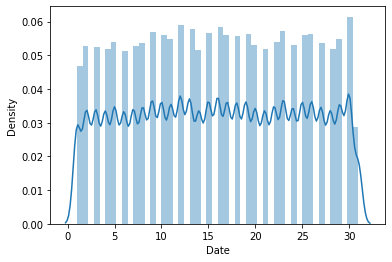

In [17]:
sns.distplot(df["Date"]) #validate using sns

<AxesSubplot:xlabel='Date', ylabel='Month'>

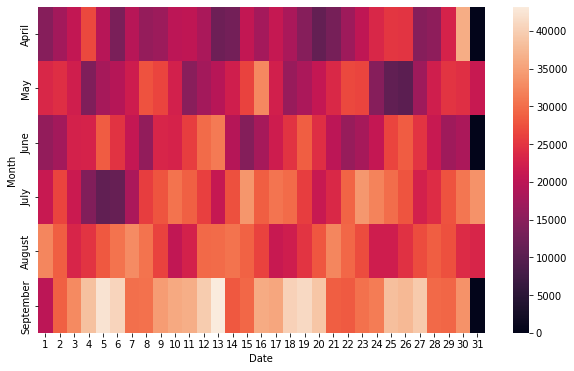

In [18]:
# create heatmap
def heatmap(col1, col2): 
    by_cross=df.groupby(by=[col1,col2])["Date/Time"].count()
    pivot=by_cross.unstack()
    plt.figure(figsize=(10,6))
    return sns.heatmap(pivot)

heatmap("Month", "Date")

The number of pickup has positive trend for last 6 months and the highest is on September. Summer break could be the factor of this increasing trends. There is no significant pattern between date and number of pickup, but i found something interesting from the heatmap above. America's Independence Day was on 4-5th July, and the pick up number is pretty low. Perhaps because there's less activity happens as the business usually closed in the holidays. 

### 2. Pickup distribution by Day of the Week and Hour

In [19]:
df["Weekday"] = df["Weekday"].astype(cat_day_order)
df["Weekday"]

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1028131    Tuesday
1028132    Tuesday
1028133    Tuesday
1028134    Tuesday
1028135    Tuesday
Name: Weekday, Length: 4534327, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [20]:
df.sort_values("Weekday")

,Date/Time,Lat,Lon,Base,Weekday,Date,Month,Hour,Minute
290704,2014-04-21 23:26:00,40.6956,-74.1779,B02617,Monday,21,April,23,26
669066,2014-07-14 14:25:00,40.7286,-74.0048,B02682,Monday,14,July,14,25
669065,2014-07-14 14:25:00,40.6449,-73.7820,B02682,Monday,14,July,14,25
669064,2014-07-14 14:25:00,40.7569,-73.9703,B02682,Monday,14,July,14,25
669063,2014-07-14 14:24:00,40.7451,-74.0026,B02682,Monday,14,July,14,24
...,...,...,...,...,...,...,...,...,...
51409,2014-08-03 12:02:00,40.7289,-73.9788,B02598,Sunday,3,August,12,2
51410,2014-08-03 12:02:00,40.8407,-73.9371,B02598,Sunday,3,August,12,2
51411,2014-08-03 12:02:00,40.6720,-74.0039,B02598,Sunday,3,August,12,2
51403,2014-08-03 12:01:00,40.7525,-73.9680,B02598,Sunday,3,August,12,1


In [21]:
px.bar(x=df.groupby(by=["Weekday"])["Date/Time"].count().index,
       y=df.groupby(by=["Weekday"])["Date/Time"].count(),
       title="Number of Trips per Day")

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

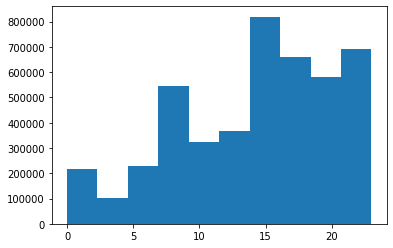

In [22]:
# Histogram

plt.hist(df["Hour"])

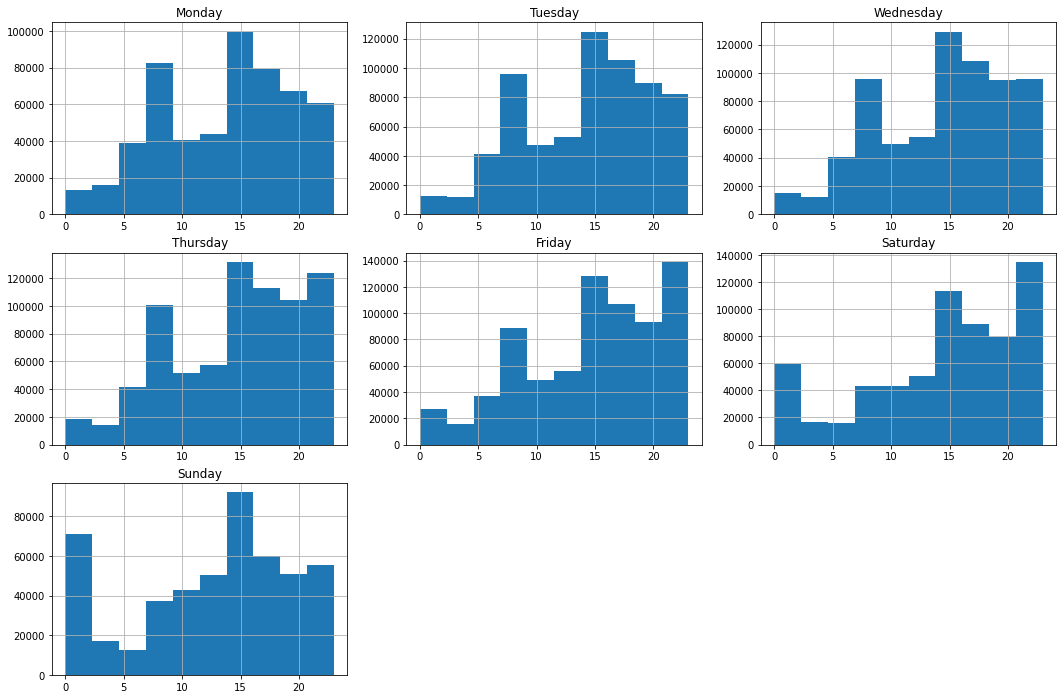

In [23]:
plt.figure(figsize=(18,12))

for i, day in enumerate(df.groupby(by=["Weekday"]) ["Date/Time"].count().index):
    plt.subplot(3,3, i+1)
    plt.title(day)
    df[df["Weekday"]==day]["Hour"].hist()

To make it clearer to interpret, we will use heatmap by creating a dataframe of number trips in every hour of every day, then unstacked it. Because we're gonna use this heatmap for another columns analysis then we can create a function of heatmap.

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

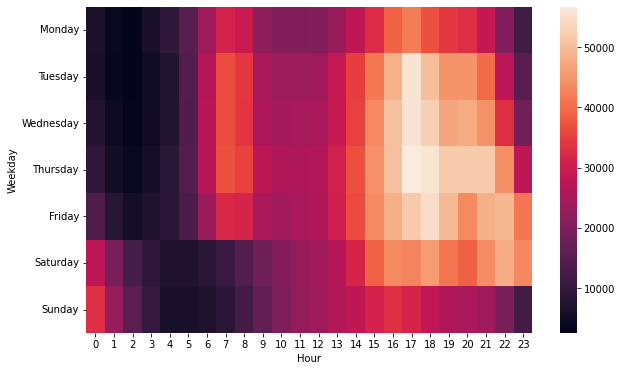

In [24]:
heatmap("Weekday", "Hour")

From the barchart, histogram, and heatmap we can see that pickup mostly happen on weekdays and reach its peak in the middle of the week on Thursday. In clock wise, there are pretty high number in the morning of weekdays at 7-8 am and get most busy at 5-8 pm. The nearer to the weekend, the night & midnight pick up number are increasing.

In [25]:
df_month_day=df.groupby(["Month", "Weekday"])["Date/Time"].count().reset_index()
df_month_day.columns=["Month", "Weekday", "Count"]
df_month_day

,Month,Weekday,Count
0,April,Monday,60861
1,April,Tuesday,91185
2,April,Wednesday,108631
3,April,Thursday,85067
4,April,Friday,90303
5,April,Saturday,77218
6,April,Sunday,51251
7,May,Monday,63846
8,May,Tuesday,76662
9,May,Wednesday,89857


Text(0.5, 1.0, 'Pickups in weekday per Month')

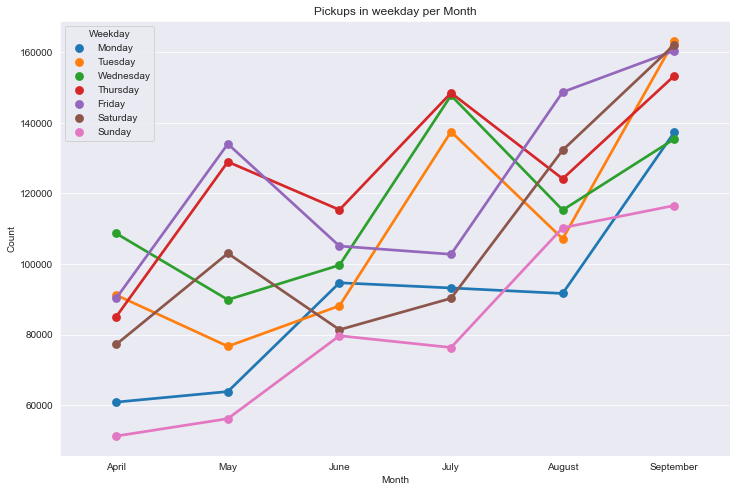

In [26]:
# show point estimates and confidence intervals using scatter plot glyphs.
# glyphs can be used as point symbols in a scatterplot to convey more information on each point. 

sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
ax=sns.pointplot(x="Month",
                 y="Count",
                 data=df_month_day,
                 hue="Weekday")
ax.set_title("Pickups in weekday per Month")